<a href="https://colab.research.google.com/github/busekoseoglu/DataAugmentationTechniques/blob/main/DataAugmentationKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation with ImageDataGenerator

In [1]:
import tensorflow as tf
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from google.colab.patches import cv2_imshow # for image display
from skimage import io
import numpy as np
from PIL import Image
from tensorflow.keras.applications.vgg16 import VGG16

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/

/content/gdrive


## Loading Images

We are using OpenCv for loading and showing images. OpenCv's cv2.imshow() function does not work in colab, so we use cv2_imshow() function.

In [ ]:
edison_path = "My Drive/img/edison/edison.jpg"
tesla_path = "My Drive/img/tesla/tesla.jpg"

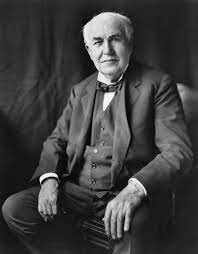

In [ ]:
ed_img = cv2.imread(path)
cv2_imshow(x_img)

 # ImageDataGenerator
 ImageDataGenerator is a augmentation technique. It generates batches of tensor image data with real-time data augmentation. The data will be looped over (in batches). It has several parameters for this process.

In the code below, we create ImageDataGenerator object with these parameters:
* rotation_range : Degree range for random rotations
* width_shift_range :  It shift the image to the left or right(horizontal shifts). If the value is float and <=1 it will take the percentage of total width as range. Suppose image width is 100px. if width_shift_range = 1.0 it will take -100% to +100% means -100px to +100px. It will shift image randomly between this range. 
* height_shift_range : It works same as width_shift_range but shift vertically(up or down).
* shear_range : Shear angle in counter-clockwise direction in degrees
* zoom_range : zoom to image
* horizontal_flip : Is it's True, image will flip horizontally
* fill-mode : It fills with black

In [ ]:
datagen = ImageDataGenerator(rotation_range=30,
                             width_shift_range = 0.2,
                             height_shift_range = 0.1,
                             shear_range = 0.25,
                             zoom_range = 0.15,
                             horizontal_flip = True,
                             fill_mode = "constant")

## Augmentatin for single image

Before starting augmentation, we should reshape image. We are adding (1, ) to the image shape. In here, 1 represents that we have one image.

In [ ]:
ed_img = ed_img.reshape((1, ) + ed_img.shape)
ed_img.shape

(1, 254, 198, 3)

We are using flow() function if we apply augmentation to one picture. We already insert picture as "ed_image". The parameters of flow():
* First image that we insert before
* batch_size
* save_to_dir : We specify the path, if we want to augmented image
* save_prefix : We specify the prefix
* save_format : We specify the format of image

In [ ]:
# Augmentation for edison image
i = 0
for batch in datagen.flow(ed_img, batch_size=16,
                          save_to_dir = "My Drive/img/augmented/",
                          save_prefix = "aug",
                          save_format = "jpg"):
    i += 1
    if i > 10:
        break


## Augmentation for multiple image

If we want apply augmentation for multiple images firstly we should create empty set, specify image directory and image size. Size is important in here, images should have the same size otherwise augmentation process won't happen.

We take images in image directory with <strong>os.listdir()</strong> function. In for loop we enumerate images and check with if statement that image names end with "jpg"? 

We insert images end with "jpg". We convert RGB and resize all. Then append to the empty dataset.

While for loop end we convert list to numpy array.

In [ ]:
dataset = []
image_directory = "My Drive/img/train/"
size = 128

images = os.listdir(image_directory)
print("Images in train directory: ", images)

for i, image_name in enumerate(images):
    print(image_name)
    if(image_name.split(".")[1] == "jpg "):
        image = cv2.imread(image_directory + image_name)
        image = Image.fromarray(image, "RGB")
        image = image.resize((size,size))
        dataset.append(np.array(image))

x = np.array(dataset)

Images in train directory:  ['edison.jpg ', 'tesla.jpg ']
edison.jpg 
tesla.jpg 


In [ ]:
# Augmentation
i = 0
for batch in datagen.flow(x, batch_size=16,
                          save_to_dir = "My Drive/img/augmented/",
                          save_prefix = "aug",
                          save_format = "jpg"):
    i += 1
    if i > 10:
        break


## Multiclass Augmentation

flow_from_directory() function can be used for this structure:

![](https://drive.google.com/uc?id=1cz9FOaGmbHxN4NtGP1xRIfwOcazOeV79)


In [ ]:
i = 0
for batch in datagen.flow_from_directory(directory="My Drive/img/tesla_edison/",
                                         batch_size=16,
                                         target_size=(256,256),
                                         color_mode="rgb",
                                         save_to_dir = "My Drive/img/augmented/",
                                         save_prefix = "aug",
                                         save_format = "jpg"):
    i += 1
    if i > 31:
        break 

Found 2 images belonging to 2 classes.
